In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


## 1. Importing the desired libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Reading the data from the csv files

In [3]:
train_data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

## 2. Visualizing the data
It's a good idea to view the data to get a feel of what the dataset actually looks like

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<Axes: xlabel='label', ylabel='count'>

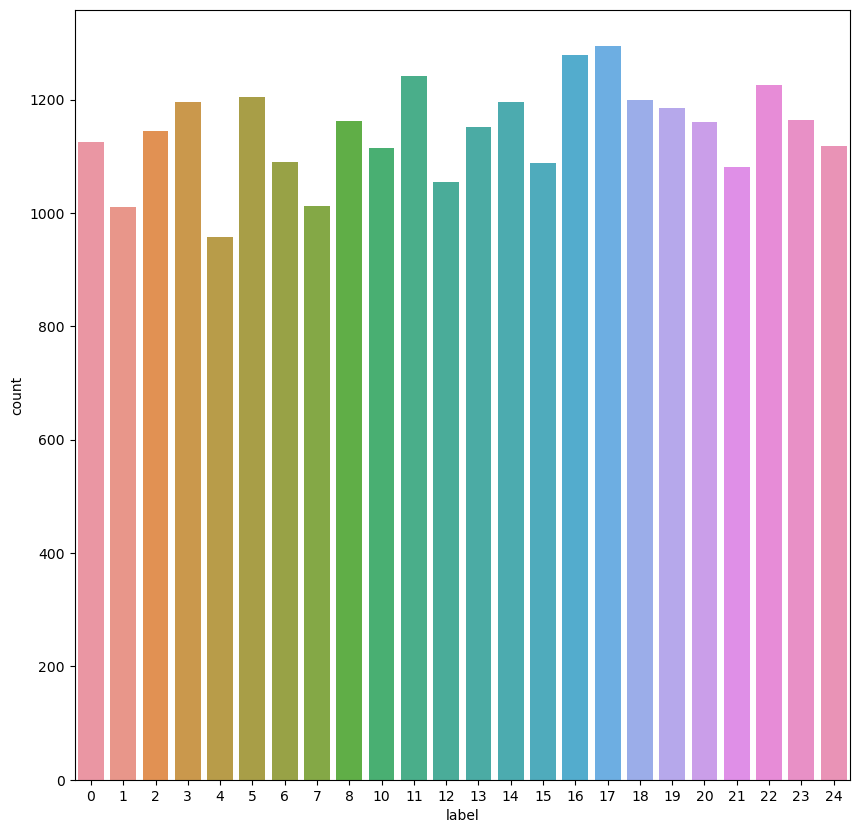

In [5]:
# Create a countplot of all the labels
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label')

## 3. Normalizing and Reshaping the data

In [6]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
labels = y_train.unique().tolist()
labels.sort()
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [8]:
# Getting the alphabets which are to be predicted
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## 4. Let's view some of the actual images

Images from the training set

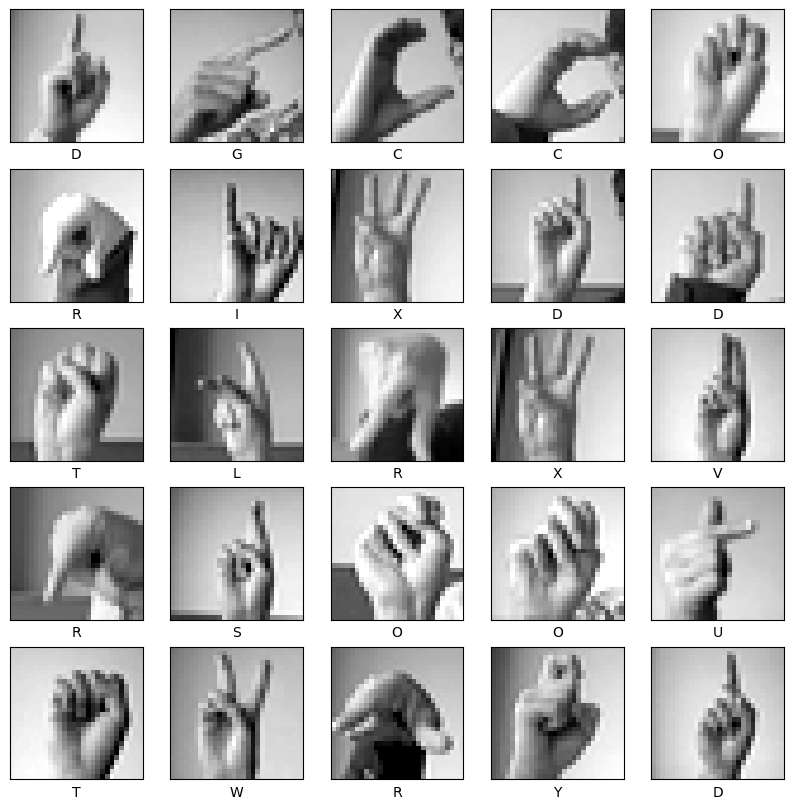

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

Images from the test set

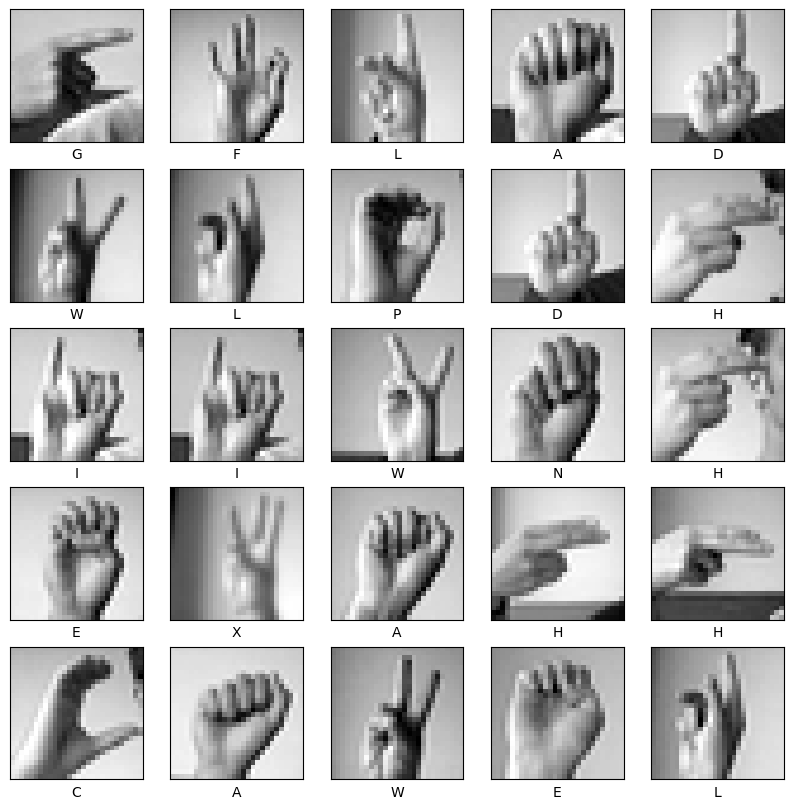

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

## 5. Binarizing the labels
Binarizing categorical data consisting of multiple classes involves converting the categorical data into a binary format. This is typically done using a technique called one-hot encoding. One-hot encoding creates a binary vector for each class, where the vector has a length equal to the number of classes and has a 1 in the position corresponding to the class and 0s elsewhere. This allows the categorical data to be represented in a format that can be used by machine learning models. We will use the `LabelBinarizer` class from `sklearn.preprocessing` for this purpose.

In [11]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

Let's see what binarizing did to `y_train`.

In [12]:
y_train_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Binarizing the labels did one-hot-encoding to the labels

In [13]:
y_train_binarized.shape

(27455, 24)

## 6. Let's build the model

We'll build a Convolutional Neural Network architecture for this

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## 7. Training the model

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
172/172 [==============================] - 9s 7ms/step - loss: 1.6463 - accuracy: 0.5282 - val_loss: 0.5789 - val_accuracy: 0.8246
Epoch 2/20
172/172 [==============================] - 1s 6ms/step - loss: 0.3591 - accuracy: 0.8977 - val_loss: 0.2162 - val_accuracy: 0.9394
Epoch 3/20
172/172 [==============================] - 1s 5ms/step - loss: 0.1077 - accuracy: 0.9803 - val_loss: 0.0526 - val_accuracy: 0.9960
Epoch 4/20
172/172 [==============================] - 1s 5ms/step - loss: 0.0365 - accuracy: 0.9975 - val_loss: 0.0216 - val_accuracy: 0.9984
Epoch 5/20
172/172 [==============================] - 1s 5ms/step - loss: 0.0154 - accuracy: 0.9996 - val_loss: 0.0152 - val_accuracy: 0.9996
Epoch 6/20
172/172 [==============================] - 1s 5ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/20
172/172 [==============================] - 1s 5ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 

## 8. Let's evaluate the model's performance

In [17]:
model.evaluate(X_test, y_test_binarized)

225/225 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.9257


[0.35680556297302246, 0.9256832003593445]

## 9. Let's plot the graphs that define the change in accuracy and loss while training

225/225 - 0s - loss: 0.3568 - accuracy: 0.9257 - 499ms/epoch - 2ms/step


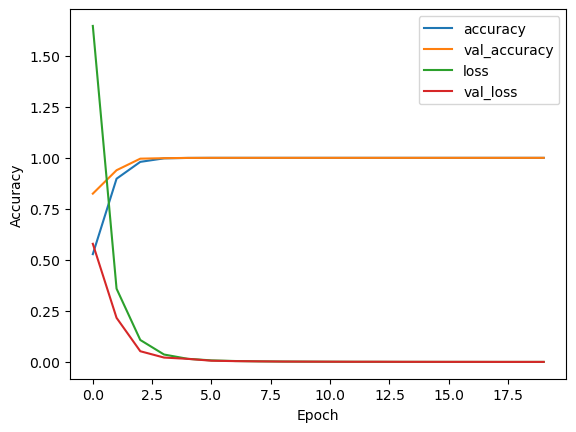

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test, y_test_binarized, verbose=2)

In [19]:
print(f'Test accuracy is {test_acc * 100:.2f}%')

Test accuracy is 92.57%


## 10. Run the cell below to get the prediction for a random Sign Language

1/1 [==============================] - 0s 124ms/step


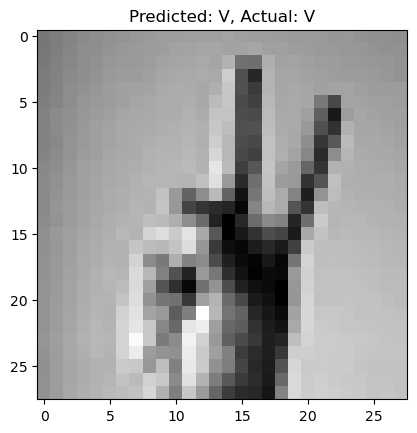

In [20]:
rand_idx = np.random.randint(0, len(X_test))

image = X_test[rand_idx]
label = y_test[rand_idx]

prediction = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {classes[predicted_class]}, Actual: {classes[label] if label < 9 else classes[label - 1]}')
plt.show()